In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers


In [2]:
base_dir = r"C:\Users\KARACIK\Desktop\Yeni klasör\f1"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(
        base_dir,
        target_size=(500, 500),
        batch_size=2,
        subset='training')

test_datagen = test_datagen.flow_from_directory(
        base_dir,
        target_size=(500, 500),
        batch_size=2,
        subset='validation')

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


(2, 500, 500, 3)
[1. 0. 0. 0.]


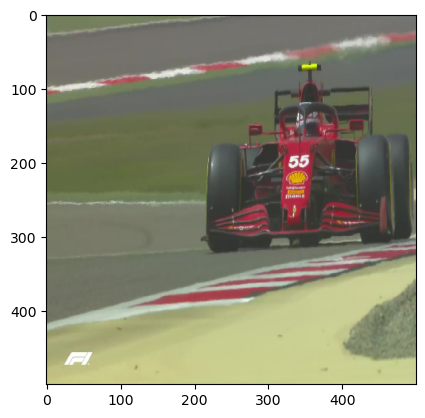

(2, 500, 500, 3)
[0. 0. 1. 0.]


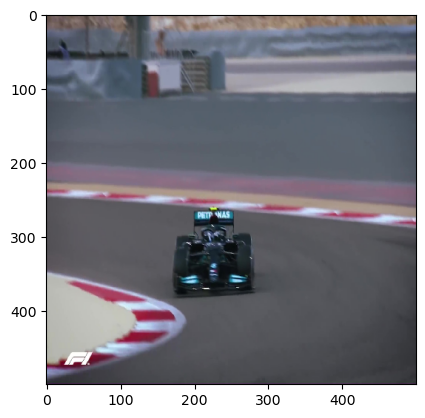

(2, 500, 500, 3)
[1. 0. 0. 0.]


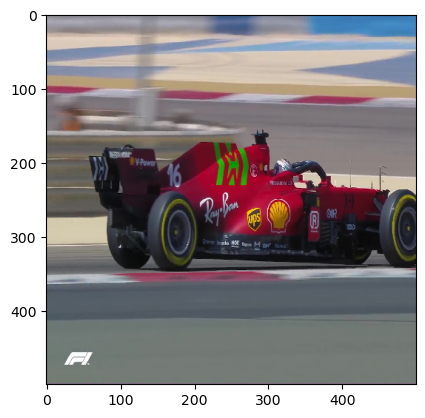

(2, 500, 500, 3)
[1. 0. 0. 0.]


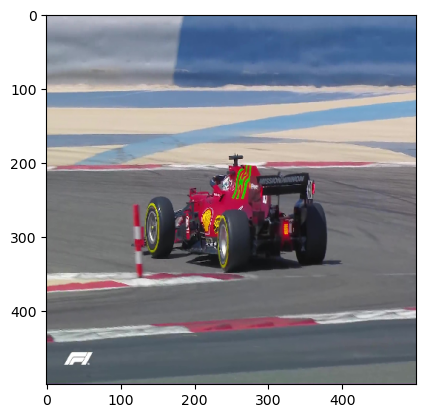

(2, 500, 500, 3)
[1. 0. 0. 0.]


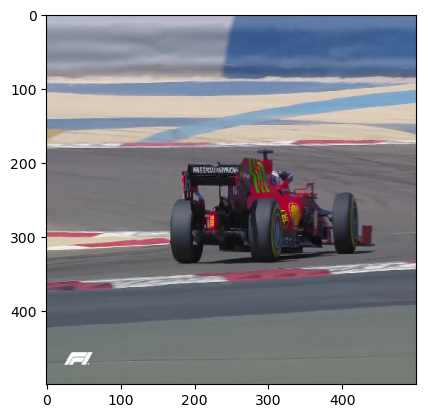

In [3]:
for _ in range(5):
    img , label = test_datagen.next()
    print(img.shape)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

In [4]:
model = Sequential()

model.add(layers.Conv2D(filters=4, activation="elu",
                        kernel_size=(5, 5), input_shape=(500, 500, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=8, activation="elu",
                        kernel_size=(3, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=16, activation="elu",
                        kernel_size=(2, 2)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=32, activation="elu",
                        kernel_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(50, activation="elu"))
model.add(layers.Dense(100, activation="elu"))
model.add(layers.Dense(100, activation="elu"))
model.add(layers.Dense(50, activation="elu"))
model.add(layers.Dense(4, activation="softmax"))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 16)      528       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 16)       0

In [6]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

In [7]:
model.compile(optimizer = optimizer , loss = loss , metrics = ["mse" , "accuracy"])

In [8]:
result = model.fit_generator(train_datagen , epochs = 5 , verbose = 1 , validation_data = test_datagen)

C:\Users\KARACIK\AppData\Local\Temp\ipykernel_3056\2182200830.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_datagen , epochs = 5 , verbose = 1 , validation_data = test_datagen)


Epoch 1/5
126/126 [==============================] - 59s 456ms/step - loss: 1.2161 - mse: 0.1556 - accuracy: 0.4960 - val_loss: 1.5527 - val_mse: 0.1976 - val_accuracy: 0.3929
Epoch 2/5
126/126 [==============================] - 74s 591ms/step - loss: 0.4388 - mse: 0.0604 - accuracy: 0.8135 - val_loss: 1.5193 - val_mse: 0.1663 - val_accuracy: 0.6071
Epoch 3/5
126/126 [==============================] - 78s 620ms/step - loss: 0.1095 - mse: 0.0103 - accuracy: 0.9762 - val_loss: 1.5118 - val_mse: 0.1497 - val_accuracy: 0.6429
Epoch 4/5
126/126 [==============================] - 82s 650ms/step - loss: 0.0683 - mse: 0.0079 - accuracy: 0.9802 - val_loss: 2.0828 - val_mse: 0.1915 - val_accuracy: 0.5357
Epoch 5/5
126/126 [==============================] - 85s 678ms/step - loss: 0.0157 - mse: 6.6390e-04 - accuracy: 1.0000 - val_loss: 1.8689 - val_mse: 0.1570 - val_accuracy: 0.6429


In [9]:
result.history

{'loss': [1.2161262035369873,
  0.43881550431251526,
  0.10947809368371964,
  0.06829853355884552,
  0.015699608251452446],
 'mse': [0.155572310090065,
  0.0603952556848526,
  0.010332372970879078,
  0.007860378362238407,
  0.0006639023777097464],
 'accuracy': [0.4960317313671112,
  0.8134920597076416,
  0.976190447807312,
  0.9801587462425232,
  1.0],
 'val_loss': [1.5527347326278687,
  1.5193103551864624,
  1.5117937326431274,
  2.0827925205230713,
  1.8689346313476562],
 'val_mse': [0.1976429522037506,
  0.16631127893924713,
  0.14966025948524475,
  0.19145400822162628,
  0.15699908137321472],
 'val_accuracy': [0.3928571343421936,
  0.6071428656578064,
  0.6428571343421936,
  0.5357142686843872,
  0.6428571343421936]}

In [12]:
model.save("save_model/video.h5")

In [15]:
acc = result.history["accuracy"]
val_acc = result.history["val_accuracy"]
acc_loss = result.history["loss"]
val_loss = result.history["val_loss"]

In [16]:
epoch = range(1 , len(acc)+1)

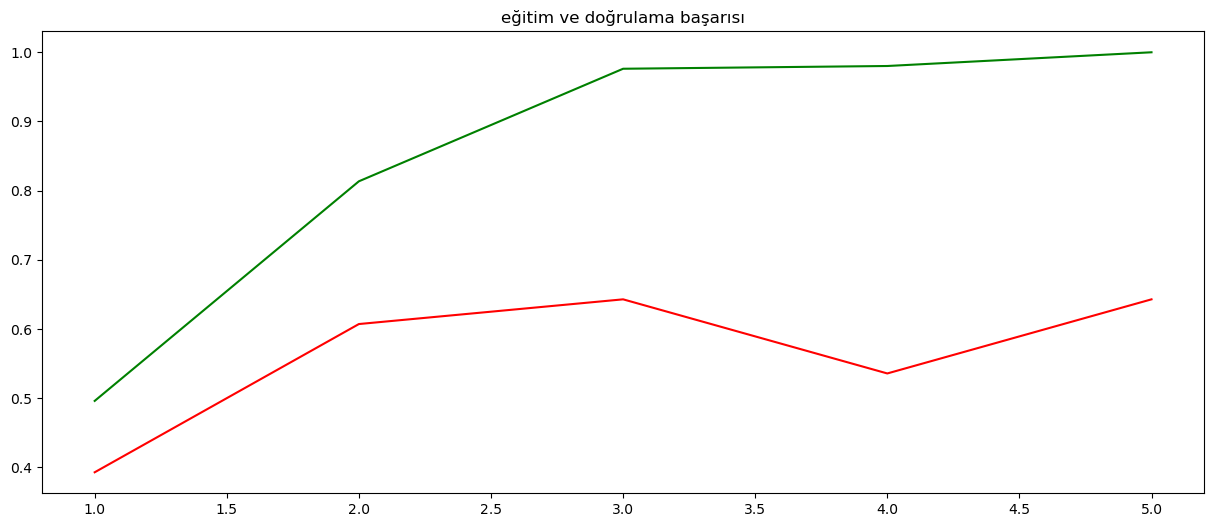

In [23]:
plt.figure(figsize = (15,6))
plt.plot(epoch , acc , label = ("eğitimin başarısı") , color = "g")
plt.plot(epoch , val_acc , label = ("doğrulama başarısı") , color = "r")
plt.title("eğitim ve doğrulama başarısı");

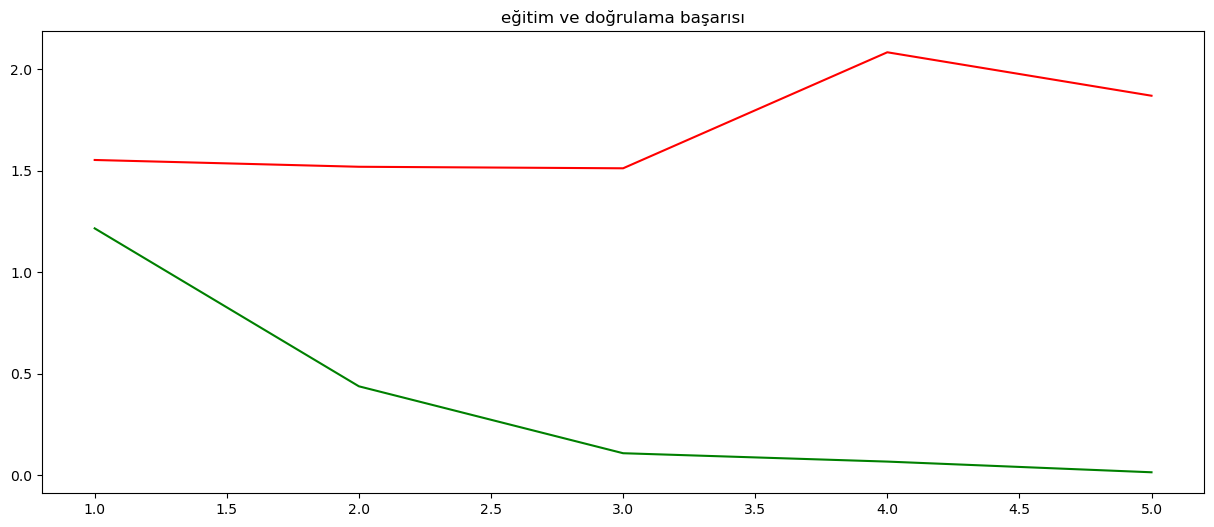

In [22]:
plt.figure(figsize = (15,6))
plt.plot(epoch , acc_loss , label = ("eğitimin kaybı") , color = "g")
plt.plot(epoch , val_loss , label = ("doğrulama kaybı") , color = "r")
plt.title("eğitim ve doğrulama başarısı");